In [1]:
import numpy as np
import pickle
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import pathlib
import ast
import scipy.stats

from PIL import Image

In [2]:
from bci_plot.gen_fig.robot import gen_robot_fig
from bci_plot.metadata import robot_random

In [3]:
images = {}
for name in ['ab_raw', 'ab_annotated_rot', 'sequences_raw', 'sequences_annotated_rot']:
    images[name] = Image.open(f'../../data/robot_compiled/images/{name}.png') 

In [4]:
with open('../../data/robot_compiled/robot_compiled_stats.pickle', 'rb') as f:
    stats = pickle.load(f)
with open('../../data/robot_compiled/sequences_compiled_stats.pickle', 'rb') as f:
    results = pickle.load(f)
results['sequence_actions'] = robot_random.sequence_actions

In [5]:
#plt.figure(dpi=150, figsize=(10, 3))

#plt.subplot(1, 2, 1)

subjects = ['S2', 'H1', 'H2', 'H4']
for subject_idx, subject in enumerate(subjects):
    movement_time_per_action = [(item['total_movement_time']/item['n_actions']) for item in results[subject]]
    
    print(subject, np.median(movement_time_per_action), np.mean(movement_time_per_action))
    #bplot = plt.boxplot([movement_time_per_action], positions=[subject_idx], vert=True, patch_artist=True, showfliers=True)
    #gen_robot_fig.format_boxplot(bplot, gen_robot_fig.median_color, '_nolegend_', 'grey', 'hover' if subject_idx == 0 else '_nolegend_')
#_ = plt.xticks(np.arange(len(subjects)), subjects)
#_ = plt.ylim((0, plt.ylim()[1]))
#plt.ylabel('movement time per action (s)')


#plt.subplot(1, 2, 2)

subjects = ['S2', 'H1', 'H2', 'H4']
for subject_idx, subject in enumerate(subjects):
    action_time = [((item['trial_time'] - item['total_movement_time'])/item['n_actions']) for item in results[subject]]
    print(subject, np.median(action_time), np.mean(action_time))
    #bplot = plt.boxplot([action_time], positions=[subject_idx], vert=True, patch_artist=True, showfliers=True)
    #gen_robot_fig.format_boxplot(bplot, gen_robot_fig.median_color, '_nolegend_', 'grey', 'hover' if subject_idx == 0 else '_nolegend_')
#_ = plt.xticks(np.arange(len(subjects)), subjects)
#plt.ylabel('action time (s)')

S2 27.041779557863872 27.724578770411973
H1 9.343595892190933 9.560693360964457
H2 10.543440386652946 10.358618886669479
H4 8.651274773478509 8.351986470988818
S2 7.619294699500589 7.525555668462987
H1 6.056522637605667 6.059644290606181
H2 5.947110876441002 6.003801389137903
H4 6.168260409150804 6.159054025752203


In [6]:
trajs = [((s, e), results['S2'][3]['timestamp'][s:e], results['S2'][3]['xyz'][s:e, 0:2]) for s, e in zip(robot_random.trajectory_split[0:-1], robot_random.trajectory_split[1:None])]

In [7]:
objs_idxs = np.digitize([item[0][0] + robot_random.trajectory_offset for item in trajs], results['S2'][3]['all_objs_idx']) - 1
objs_locs = [results['S2'][3]['all_objs_list'][idx] for idx in objs_idxs]
objs_ids = [results['S2'][3]['all_objs_ids'][idx] for idx in objs_idxs]
yellow = (0.9, 0.9, 0.1)
objs_colors = ['orange', yellow, 'r', yellow, 'b', 'b', 'pink', 'g']
# yObPrBgY
trajs_description = ['pick yellow', 'place @ orange', 'pick blue', 'place @ pink', 'pick red', 'place @ blue', 'pick green', 'place @ yellow']

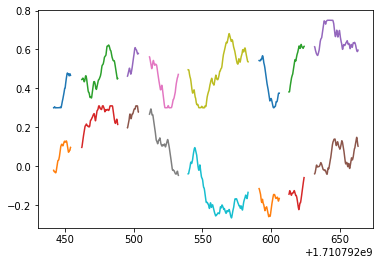

In [8]:
tmp = [((s, e), results['S2'][3]['timestamp'][s:e], results['S2'][3]['xyz'][s:e, 0:2]) for s, e in zip(robot_random.trajectory_split[0:-1], robot_random.trajectory_split[1:None])]
for ((s, e), tt, xy) in trajs:
    plt.plot(tt, xy)

S2 0.9285714285714286
H1 1.0
H2 1.0
H4 1.0
S2 391.77032566070557
H1 124.08724665641785
H2 154.84250915050507
H4 136.15621602535248


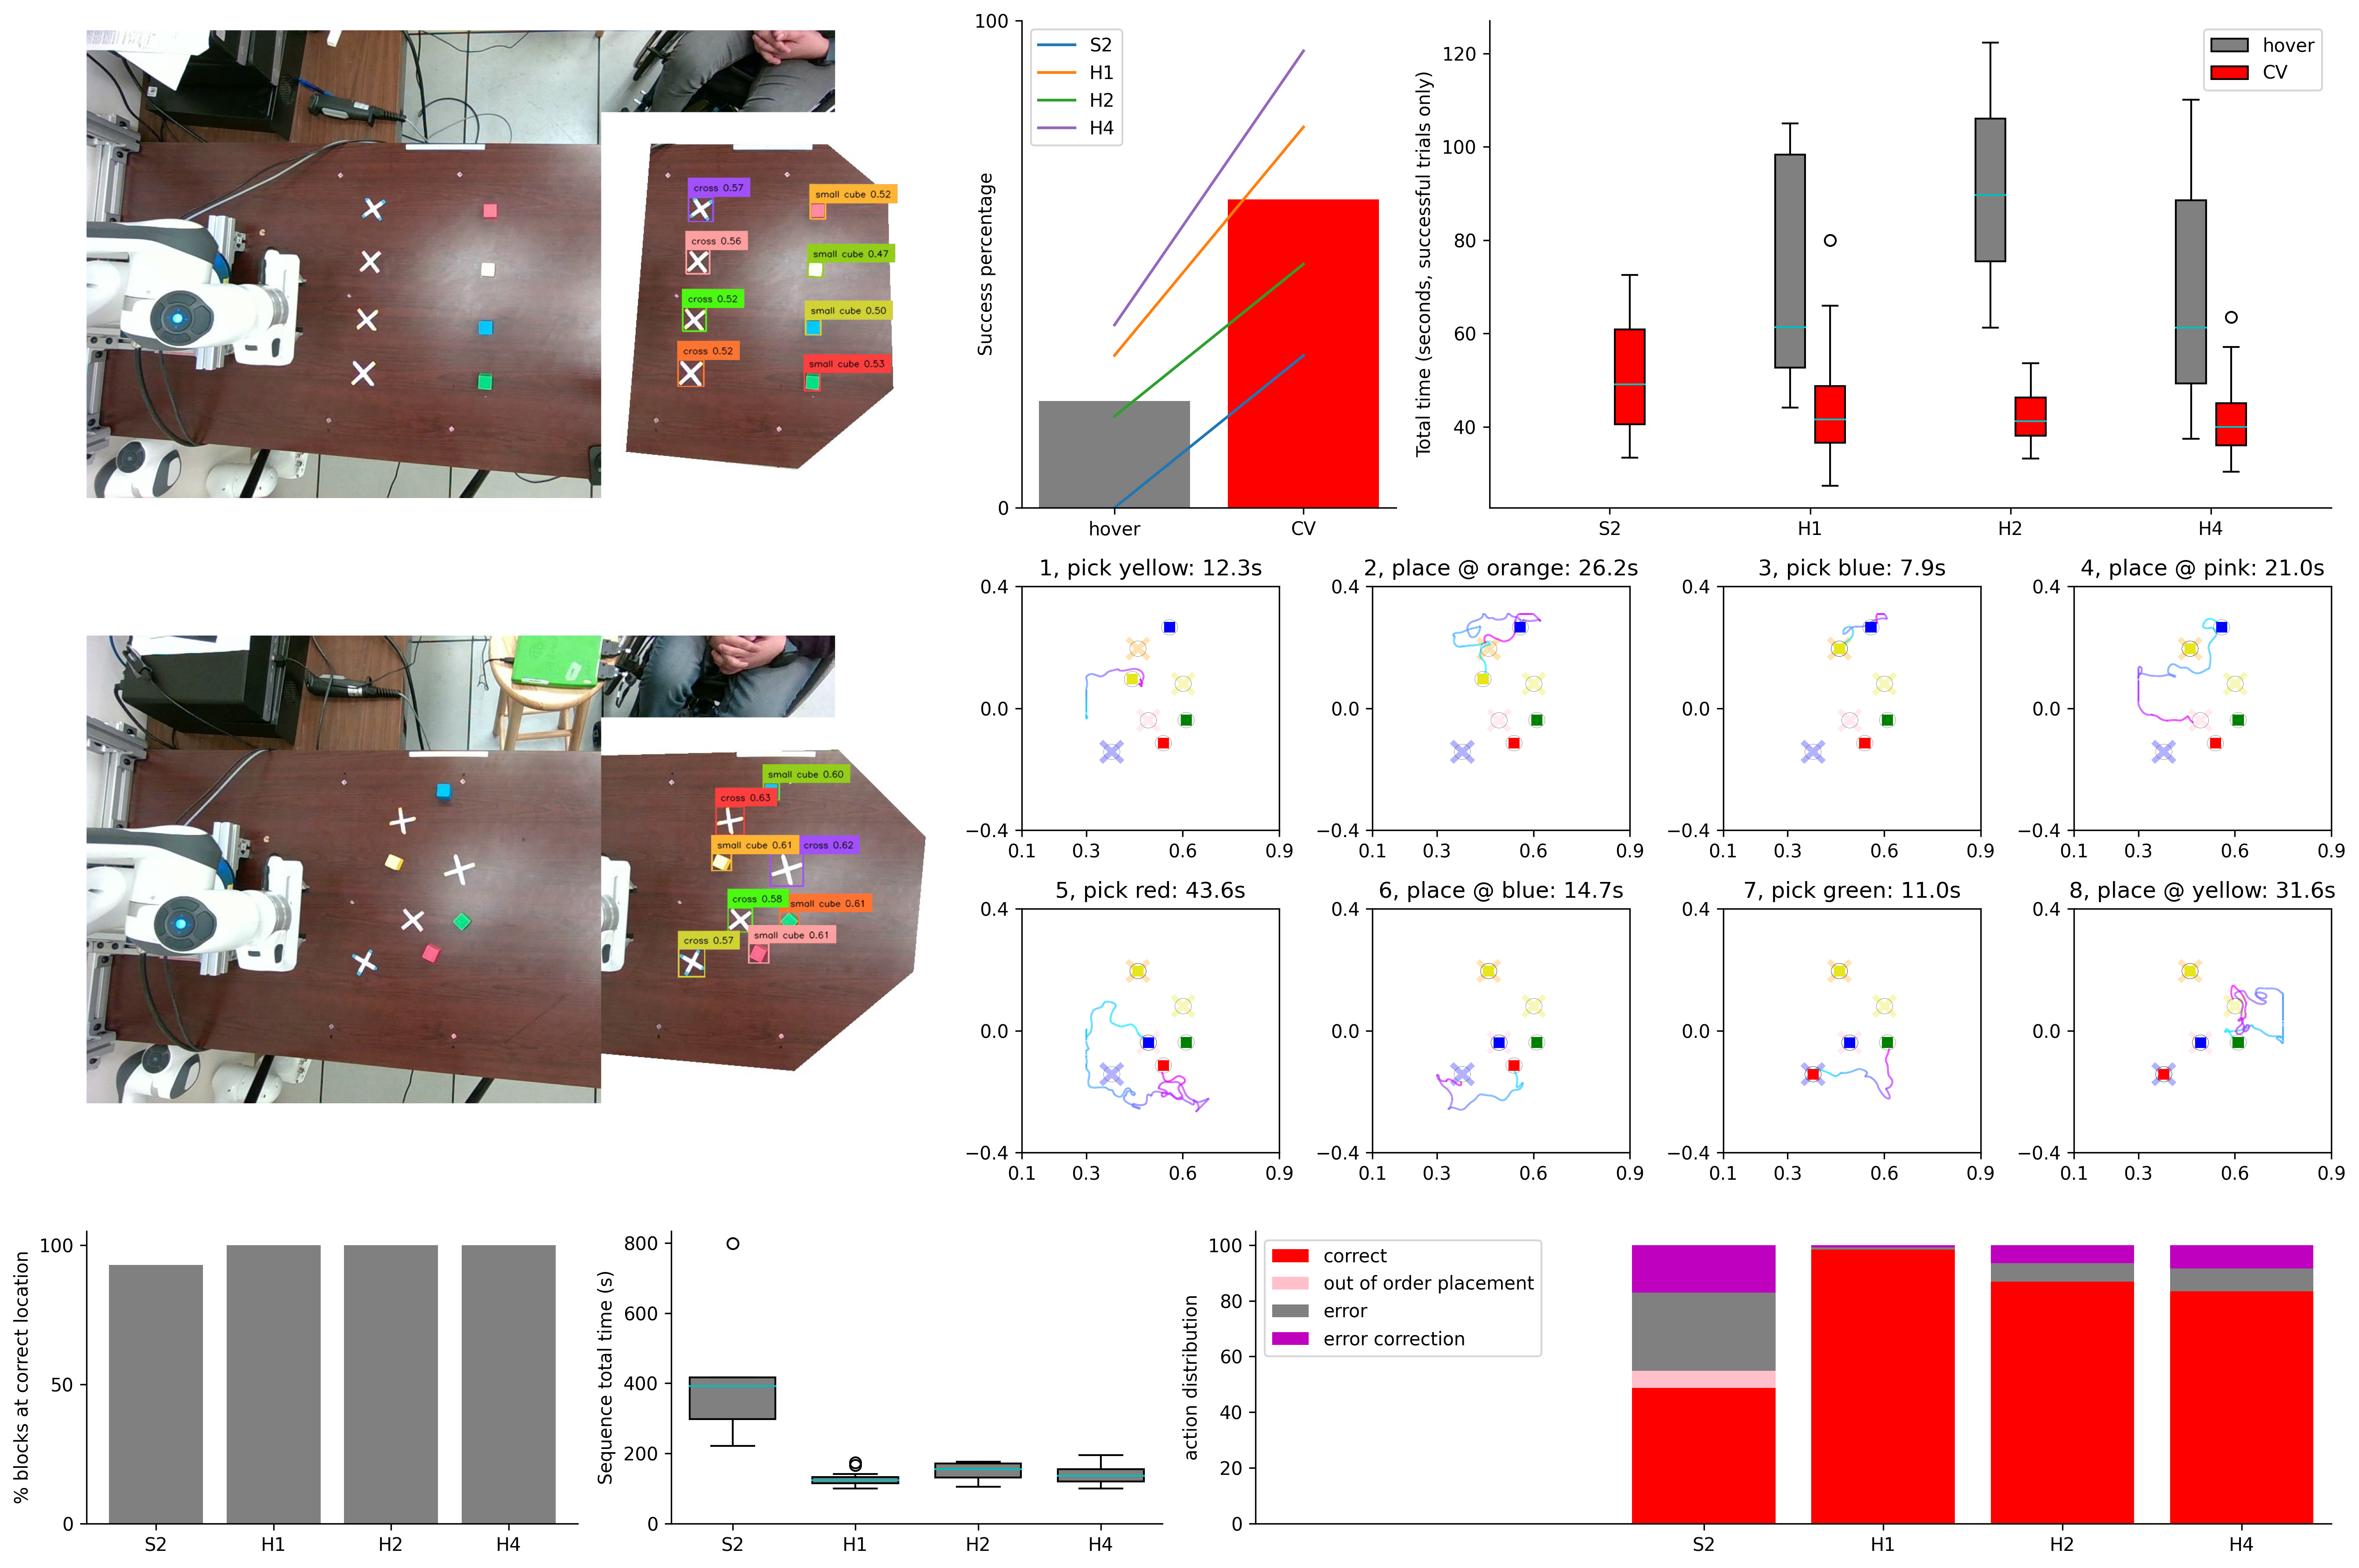

In [9]:
fig = gen_robot_fig.gen_robot_fig(stats, results, images, (trajs, objs_locs, objs_ids, objs_colors, trajs_description), ['S2', 'H1', 'H2', 'H4'])
plt.savefig('../../figs/robot/robot_fig.pdf')

cv_moving_times S2 36.71485424041748 38.736346220970155
cv_moving_times H1 29.734785556793213 31.328685388565063
cv_moving_times H2 29.049885153770447 30.152002781629562
cv_moving_times H4 27.299250721931458 28.80486128330231
cv_moving_times_all S2 52.85251200199127 52.71379251778126
cv_moving_times_all H1 29.362642645835876 32.889112785458565
cv_moving_times_all H2 33.44744563102722 39.24641880393028
cv_moving_times_all H4 27.299250721931458 29.33627349883318
S2 moving_time_per_action 27.041779557863872 27.724578770411973
H1 moving_time_per_action 9.343595892190933 9.560693360964457
H2 moving_time_per_action 10.543440386652946 10.358618886669479
H4 moving_time_per_action 8.651274773478509 8.351986470988818
S2 [7.0, 6.0, 5.0, 0.0, 8.0, 7.0, 10.0]
H1 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
H2 [0.0, 0.0, 0.0, 4.0, 2.0, 0.0, 0.0, 4.0, 0.0, 2.0]
H4 [2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 2.0, 6.0, 0.0]
[14, 10, 10, 8, 10, 12, 18]
[8, 8, 8, 8, 8, 8, 8, 8, 10,

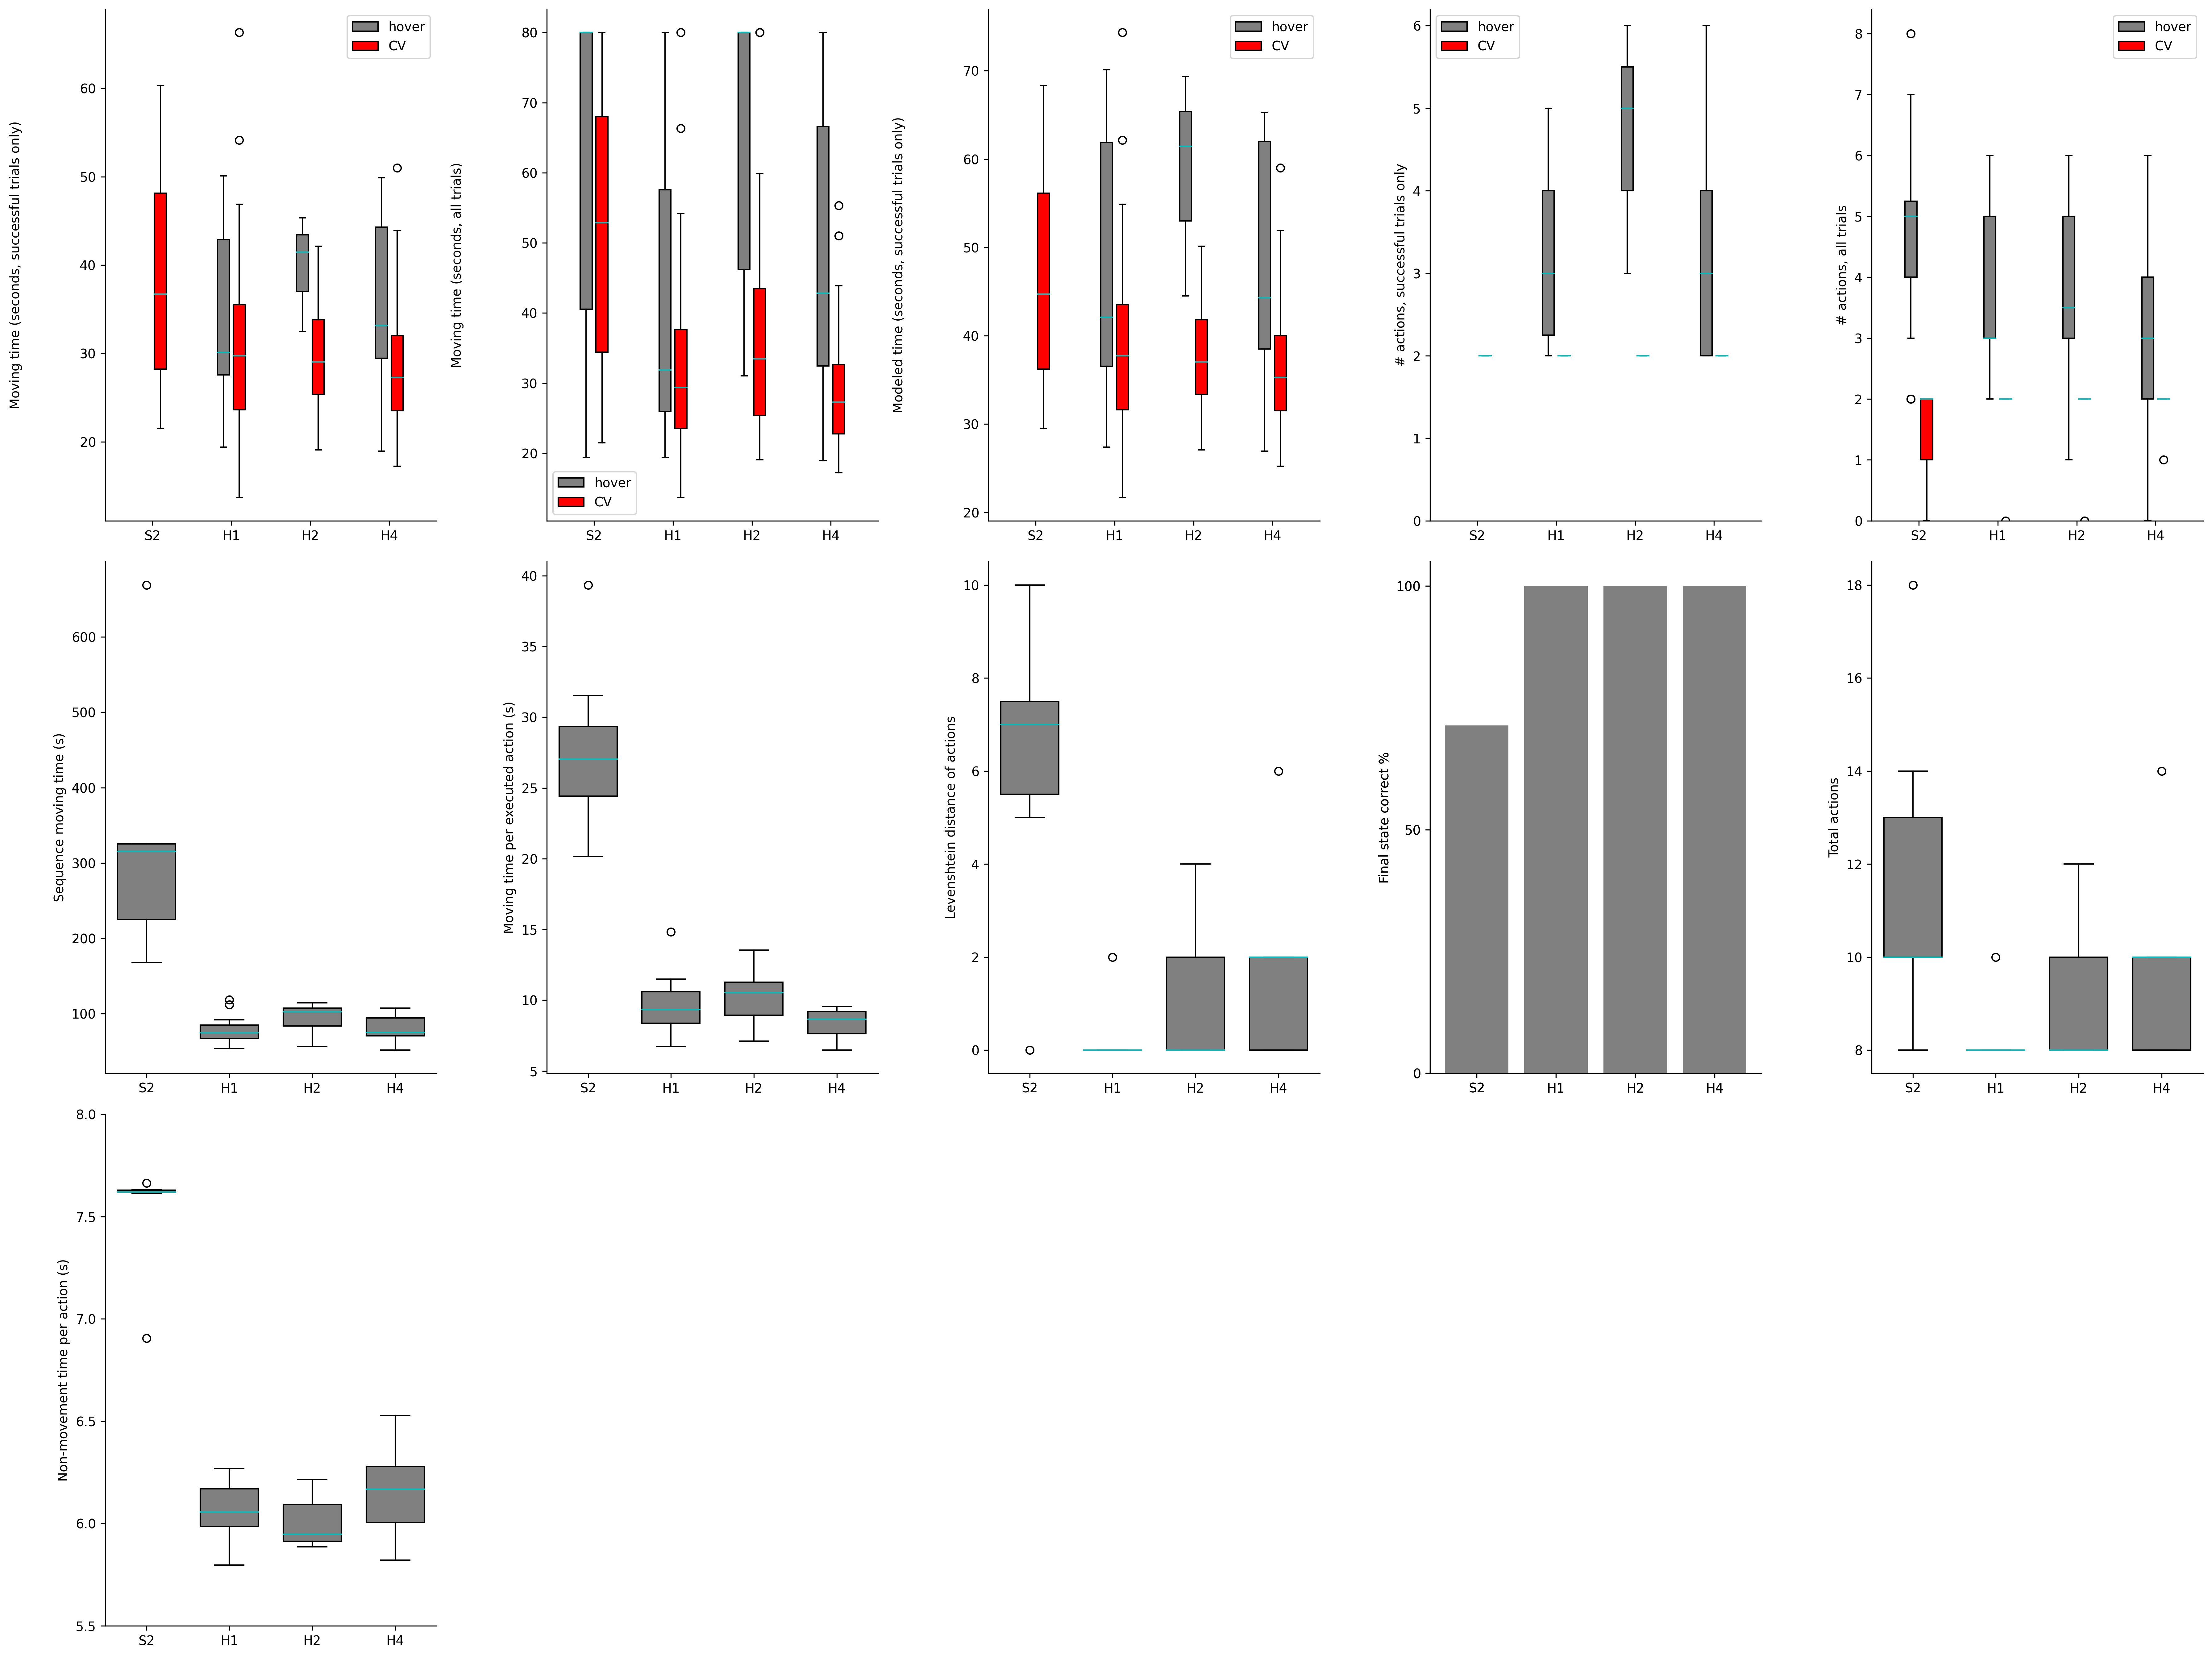

In [10]:
supp_fig = gen_robot_fig.gen_robot_supp_fig(stats, results, images, ['S2', 'H1', 'H2', 'H4'])
plt.savefig('../../figs/robot/robot_supp_fig.pdf')